# Exercise III: Cart-Pole with TD(0)
>Solve the Cart-Pole control problem using TD(0) methods.


In [109]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [97]:
#Cart-Pole Problem
env = gym.make("CartPole-v0")
env.reset()

for i in range(50000):
  action = env.action_space.sample()
  print("step i",i,"action=",action)
  obs, reward, done, info = env.step(action)
  print("obs=",obs,"reward=",reward,"done=",done,"info=",info)

  if done:
    break
    
env.close()
print("Iterations that were run:",i)

step i 0 action= 1
obs= [ 0.0386119   0.24236468  0.04542033 -0.26135868] reward= 1.0 done= False info= {}
step i 1 action= 1
obs= [ 0.04345919  0.43680983  0.04019315 -0.53937661] reward= 1.0 done= False info= {}
step i 2 action= 0
obs= [ 0.05219539  0.24114659  0.02940562 -0.23430518] reward= 1.0 done= False info= {}
step i 3 action= 0
obs= [0.05701832 0.0456171  0.02471952 0.06750626] reward= 1.0 done= False info= {}
step i 4 action= 0
obs= [ 0.05793066 -0.14985037  0.02606964  0.36788469] reward= 1.0 done= False info= {}
step i 5 action= 1
obs= [0.05493366 0.04489163 0.03342734 0.08353455] reward= 1.0 done= False info= {}
step i 6 action= 0
obs= [ 0.05583149 -0.15069315  0.03509803  0.38657363] reward= 1.0 done= False info= {}
step i 7 action= 1
obs= [0.05281763 0.04391344 0.0428295  0.10516022] reward= 1.0 done= False info= {}
step i 8 action= 0
obs= [ 0.0536959  -0.15179528  0.0449327   0.41104212] reward= 1.0 done= False info= {}
step i 9 action= 0
obs= [ 0.05065999 -0.34752447 

## a. on-policy SARSA

In [98]:
#discretize the environmental feedback (S)
'''
  Type: Box(4)
  Num     Observation               Min                     Max
  0       Cart Position             -4.8                    4.8
  1       Cart Velocity             -Inf                    Inf
  2       Pole Angle                -0.418 rad (-24 deg)    0.418 rad (24 deg)
  3       Pole Angular Velocity     -Inf                    Inf
'''

def obs2state(obs):
    """
    Discretize observations to states
    """
    digitized = [np.searchsorted(bins, o, "right") for o, bins in zip(obs, obs2state.bin_divide)]
    return (digitized * obs2state.multiplier).sum()
obs2state.bin_divide = (
        (-2.30, +0.00, +2.30),
        (-1.00, +0.00, +1.00),
        (-0.20, +0.00, +0.20),
        (-1.00, +0.00, +1.00),
        )
obs2state.multiplier = np.concatenate([[1], np.cumprod([len(i)+1 for i in obs2state.bin_divide[:-1]])])
obs2state.S = np.product([len(i)+1 for i in obs2state.bin_divide])

In [99]:
#epsilon-greedy aglorithm, return an action 0 or 1
def choose_action(env, epsilon, state, Q):
  if np.random.random() < epsilon:
    return env.action_space.sample() 
  else:
    return np.argmax(Q[state])

In [100]:
def update(state, state2, reward, action, action2,alpha,gamma):
    Q[state, action] += alpha * (reward + gamma * Q[state2, action2] - Q[state, action])

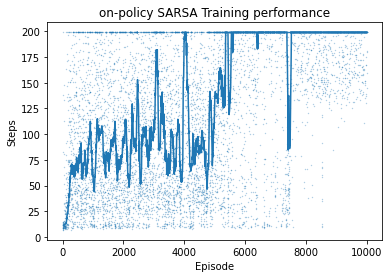

In [112]:
#on-policy sarsa
gamma = 0.999
obs = env.reset()
S = obs2state.S
A = env.action_space.n
#initialize Q, for all states Q = 0
Q = np.zeros([S,A])
steps = np.zeros(10000)

for episode in range(10000):
  epsilon = 0.1 - 0.099/10000 * episode
  alpha = 0.2 - 0.19/10000 * episode
  obs = env.reset()
  state = obs2state(obs)
  action = choose_action(env,epsilon,state,Q)

  for i in range(5000):
    obs, reward, done, info = env.step(action)
    state_ = obs2state(obs)
    action_ = choose_action(env,epsilon,state_,Q)
    update(state, state_, reward, action, action_, alpha, gamma)
    state = state_
    action = action_
    if done:
      steps[episode] = i
      break

env.close()

plt.scatter(range(len(steps)),steps, s=0.1, alpha=0.5)
plt.plot(range(len(steps)), pd.Series(steps).rolling(100).median())
plt.xlabel("Episode")
plt.ylabel("Steps")
plt.title("on-policy SARSA Training performance")
plt.show()

In [119]:
#test
print("testing:")
for episode in range(10):
  obs = env.reset()

  for i in range(5000):
    state = obs2state(obs)
    action = np.argmax(Q[state])
    obs, reward, done, info = env.step(action)
    if done:
      print(f"Episode {episode} lasted {i} steps")
      break
    
  env.close()

testing:
Episode 0 lasted 199 steps
Episode 1 lasted 199 steps
Episode 2 lasted 199 steps
Episode 3 lasted 199 steps
Episode 4 lasted 199 steps
Episode 5 lasted 199 steps
Episode 6 lasted 199 steps
Episode 7 lasted 199 steps
Episode 8 lasted 177 steps
Episode 9 lasted 199 steps


## b. off-policy Q learning

In [ ]:
def update(state, state2, reward, action, action2,alpha,gamma):
    Q[state, action] += alpha * (reward + gamma * Q[state2, action2] - Q[state, action])

In [ ]:
#on-policy sarsa
gamma = 0.999
obs = env.reset()
S = obs2state.S
A = env.action_space.n
#initialize Q, for all states Q = 0
Q = np.zeros([S,A])
steps = np.zeros(10000)

for episode in range(10000):
  epsilon = 0.1 - 0.099/10000 * episode
  alpha = 0.2 - 0.19/10000 * episode
  obs = env.reset()
  state = obs2state(obs)
  action = choose_action(env,epsilon,state,Q)

  for i in range(5000):
    obs, reward, done, info = env.step(action)
    state_ = obs2state(obs)
    action_ = choose_action(env,epsilon,state_,Q)
    update(state, state_, reward, action, action_, alpha, gamma)
    state = state_
    action = action_
    if done:
      steps[episode] = i
      break

env.close()

plt.scatter(range(len(steps)),steps, s=0.1, alpha=0.5)
plt.plot(range(len(steps)), pd.Series(steps).rolling(100).median())
plt.xlabel("Episode")
plt.ylabel("Steps")
plt.title("on-policy SARSA Training performance")
plt.show()

In [ ]:
Q, train_steps = off_policy_Q(0.8,0.05,0.99)

<function matplotlib.pyplot.show>

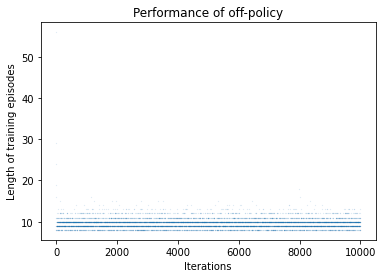

In [ ]:
plt.plot(train_steps, '.', markersize=0.1)
plt.title("Performance of off-policy")
plt.xlabel("Iterations")
plt.ylabel("Length of training episodes")
plt.show

## c. off-policy Expected SARSA with an epsilon-greedy policy

In [49]:
def discretize_state(obs):
  discretized = list()
  buckets = (3, 3, 6, 6)
  upper_bounds = [env.observation_space.high[0], 0.5, env.observation_space.high[2], math.radians(50) / 1.]
  lower_bounds = [env.observation_space.low[0], -0.5, env.observation_space.low[2], -math.radians(50) / 1.]
  for i in range(len(obs)):
    scaling = ((obs[i] + abs(lower_bounds[i])) / (upper_bounds[i] - lower_bounds[i]))
    new_obs = int(round((buckets[i] - 1) * scaling))
    new_obs = min(buckets[i] - 1, max(0, new_obs))
    discretized.append(new_obs)
  return tuple(discretized)

In [50]:
def get_epsilon(episode):
  # Ensures that there's almost at least a min_epsilon chance of randomly exploring
  min_epsilon = 0.1
  decay = 25
  return max(min_epsilon, min(1., 1. - math.log10((episode + 1) / decay)))

def get_learning_rate(episode):
  # Learning rate also declines as we add more episodes
  min_lr = 0.1
  decay = 25
  return max(min_lr, min(1., 1. - math.log10((episode + 1) / decay)))

In [51]:
def off_policy_Q(gamma,env):
  buckets = (3,3,6,6)
  Q = np.zeros(buckets + (env.action_space.n,))
  steps = np.zeros(5000)
  for episode in range(5000):
    # Initializes the state
    state = discretize_state(env.reset())
    alpha = get_learning_rate(episode)
    epsilon = get_epsilon(episode)
    done = False
    while not done:
      steps[episode] += 1
      action = choose_action(env, epsilon, state, Q)
      # Take action
      obs, reward, done, _ = env.step(action)
      new_state = discretize_state(obs)
      # Update Q(S,A)
      Q[state][action] += alpha * (reward + gamma * np.max(Q[new_state]) - Q[state][action])
      state = new_state
  return steps    

In [52]:
steps = off_policy_Q(0.9,env)

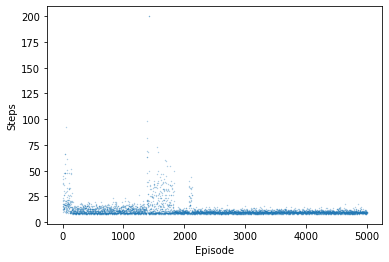

In [53]:
plt.scatter(range(len(steps)), steps, s=0.1, alpha=0.5)
plt.xlabel("Episode")
plt.ylabel("Steps")
plt.show()

In [57]:
class CartPoleQAgent():
    def __init__(self, buckets = (3,3,6,6), num_episodes=5000, min_lr=0.1, min_epsilon=0.05, discount=0.9, decay=25):
        self.buckets = buckets
        self.num_episodes = num_episodes
        self.min_lr = min_lr
        self.min_epsilon = min_epsilon
        self.discount = discount
        self.decay = decay
        self.env = gym.make('CartPole-v0')
        self.upper_bounds = [self.env.observation_space.high[0], 0.5, self.env.observation_space.high[2], math.radians(50) / 1.]
        self.lower_bounds = [self.env.observation_space.low[0], -0.5, self.env.observation_space.low[2], -math.radians(50) / 1.]
        # This is the action-value function being initialized to 0's
        self.Q = np.zeros(self.buckets + (self.env.action_space.n,))
        self.steps = np.zeros(self.num_episodes) 

    def discretize_state(self, obs):
        discretized = list()
        for i in range(len(obs)):
            scaling = ((obs[i] + abs(self.lower_bounds[i])) 
                       / (self.upper_bounds[i] - self.lower_bounds[i]))
            new_obs = int(round((self.buckets[i] - 1) * scaling))
            new_obs = min(self.buckets[i] - 1, max(0, new_obs))
            discretized.append(new_obs)
        return tuple(discretized)

    def choose_action(self, state):
        if (np.random.random() < self.epsilon):
            return self.env.action_space.sample() 
        else:
            return np.argmax(self.Q[state])
            
    def get_epsilon(self, t):
        """Gets value for epsilon. It declines as we advance in episodes."""
        # Ensures that there's almost at least a min_epsilon chance of randomly exploring
        return max(self.min_epsilon, min(1., 1. - math.log10((t + 1) / self.decay)))

    def get_alpha(self, t):
        """Gets value for learning rate. It declines as we advance in episodes."""
        # Learning rate also declines as we add more episodes
        return max(self.min_lr, min(1., 1. - math.log10((t + 1) / self.decay)))

    
    def update_q(self, state, action, reward, new_state):
        self.Q[state][action] += self.alpha * (reward + self.discount * np.max(self.Q[new_state]) - self.Q[state][action])

    def train(self):
        for episode in range(self.num_episodes):
            # Initializes the state
            state = self.discretize_state(self.env.reset())

            self.alpha = self.get_alpha(episode)
            self.epsilon = self.get_epsilon(episode)
            done = False
            
            # Looping for each step
            while not done:
                self.steps[episode] += 1
                action = self.choose_action(state)
                obs, reward, done, _ = self.env.step(action)
                new_state = self.discretize_state(obs)
                self.update_q(state, action, reward, new_state)
                state = new_state
    
    def plot_learning(self):
        """
        Plots the number of steps at each episode and prints the
        amount of times that an episode was successfully completed.
        """
        plt.scatter(range(len(self.steps)),self.steps, s=0.1, alpha=0.5)
        plt.xlabel("Episode")
        plt.ylabel("Steps")
        plt.show()

In [58]:
def load_q_learning():
    agent = CartPoleQAgent()
    agent.train()
    agent.plot_learning()
    return agent

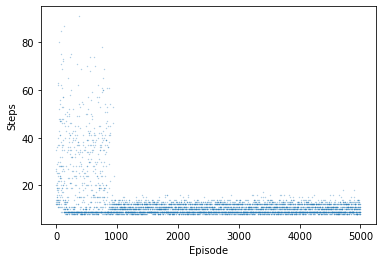

In [59]:
agent = load_q_learning()

In [ ]:
Q_table = np.zeros((3, 3, 6, 6) + (2,))
Q_table

array([[[[[0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.]]],


        [[[0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.]],

         [[0., 0.],
  